_Course: Programming for Data Analytics_
- Name: Muhammad Umar Uz Zaman
- Student ID: 1197819
- Goal: EDA Analysis of the given dataset to predict future housing market trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset in to start analysis (I changed the name of the csv for ease) and checking it out
df = pd.read_csv("Dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19984 non-null  float64
 2   bathrooms         19988 non-null  float64
 3   sqft_living       19998 non-null  float64
 4   sqft_total        19994 non-null  float64
 5   floors            19999 non-null  float64
 6   condition         19998 non-null  float64
 7   grade             19999 non-null  int64  
 8   built             19998 non-null  float64
 9   renovated         19999 non-null  int64  
 10  living_area_sqft  19993 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


In [3]:
# Summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.999500e+04,19984.000000,19988.000000,19998.000000,1.999400e+04,19999.000000,19998.000000,19999.000000,19998.000000,19999.000000,19993.000000
mean,5.353944e+05,3.366593,2.072969,2057.936294,1.560696e+04,1.444872,3.441794,7.605730,1967.953145,90.812041,1974.197819
std,3.659217e+05,0.930136,0.761162,905.640821,4.177576e+04,0.516672,0.665473,1.172624,28.317403,415.947901,675.199588
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,4.499000e+05,3.000000,2.000000,1900.000000,7.817500e+03,1.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,4.000000,8.000000,1991.000000,0.000000,2336.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [5]:
# Let's check if all the data types are correct for each column
df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [6]:
df['price'].describe()

count    1.999500e+04
mean     5.353944e+05
std      3.659217e+05
min      7.500000e+04
25%      3.170000e+05
50%      4.499000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [7]:
# Checking if all price value are integers and if any decimals are present
(df['price'] % 1 != 0).any()

True

Since price has all integers. No decimals we can convert it to int64

In [8]:
# So I tried to convert but since we have NaN (Null) values I cant. So let's deal with them first.
# df['price'] = df['price'].astype('int64')

In [9]:
df.isnull().sum()

price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

We shall handle and eradicate all Null values from this dataset to prep it for analysis

In [10]:
# Price Null rows are completely dropped since they are so few and difficult to approximate the price
df = df.dropna(subset=['price'])

In [11]:
# For bedrooms I am using the median to fill in the values
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [12]:
# For bathrooms lets check all unique values before deciding how to deal with them
df['bathrooms'].unique()

array([1.  ,  nan, 3.  , 2.  , 4.5 , 2.25, 1.5 , 2.5 , 1.75, 2.75, 3.25,
       4.  , 3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25])

In [13]:
# For bathrooms I shall choose median as well since it contains decimals
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [14]:
# Median for sqft_living and sqft total
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].median())
df['sqft_total'] = df['sqft_total'].fillna(df['sqft_total'].median())

In [15]:
# For condition (which varies from 1 till 5) I am choosing mode since median could give a decimal answer
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [16]:
# For built I am choosing median since only one missing value and same for living area sqft
df['built'] = df['built'].fillna(df['built'].median())
df['living_area_sqft'] = df['living_area_sqft'].fillna(df['living_area_sqft'].median())

In [17]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

Null values have been removed from the dataset via median/mode Null value handling strategies taught in class

In [18]:
df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19995 non-null  float64
 2   bathrooms         19995 non-null  float64
 3   sqft_living       19995 non-null  float64
 4   sqft_total        19995 non-null  float64
 5   floors            19995 non-null  float64
 6   condition         19995 non-null  float64
 7   grade             19995 non-null  int64  
 8   built             19995 non-null  float64
 9   renovated         19995 non-null  int64  
 10  living_area_sqft  19995 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.8 MB


In [20]:
# Converting all columns with only whole number values from float64 to int64 for efficiency
# Not converting Floors and bathrooms since they contain  decimals

df['bedrooms'] = df['bedrooms'].astype('int64')           # bedrooms are always whole numbers
df['sqft_living'] = df['sqft_living'].astype('int64')     # square footage with no decimals
df['sqft_total'] = df['sqft_total'].astype('int64')       # total area, all whole numbers
df['condition'] = df['condition'].astype('int64')         # categorical 1–5 scale
df['built'] = df['built'].astype('int64')                 # year of construction
df['living_area_sqft'] = df['living_area_sqft'].astype('int64')  # whole-number area values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19995 non-null  float64
 1   bedrooms          19995 non-null  int64  
 2   bathrooms         19995 non-null  float64
 3   sqft_living       19995 non-null  int64  
 4   sqft_total        19995 non-null  int64  
 5   floors            19995 non-null  float64
 6   condition         19995 non-null  int64  
 7   grade             19995 non-null  int64  
 8   built             19995 non-null  int64  
 9   renovated         19995 non-null  int64  
 10  living_area_sqft  19995 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


Beginning EDA 

In [22]:
summary_table = df.describe().T
summary_table

,count,mean,std,min,25%,50%,75%,max
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0


In [23]:
# Let's check for skewness in the dataset
summary_table["skewness"] = df[summary_table.index].skew()
summary_table

,count,mean,std,min,25%,50%,75%,max,skewness
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0,4.119874
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0,2.155397
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0,0.553547
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0,1.523693
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0,13.040022
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5,0.683503
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0,0.915424
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0,0.824340
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0,-0.448511
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0,4.361997


- Price, Bedrooms, Sqft_Total, and Renovated are highly right skewed which will have to be fixed.
- Bathrooms, Floors, Condition, Grade are not as highly skewed but still skewed to the right
- Built is mostly symmetric since its under ±0.5

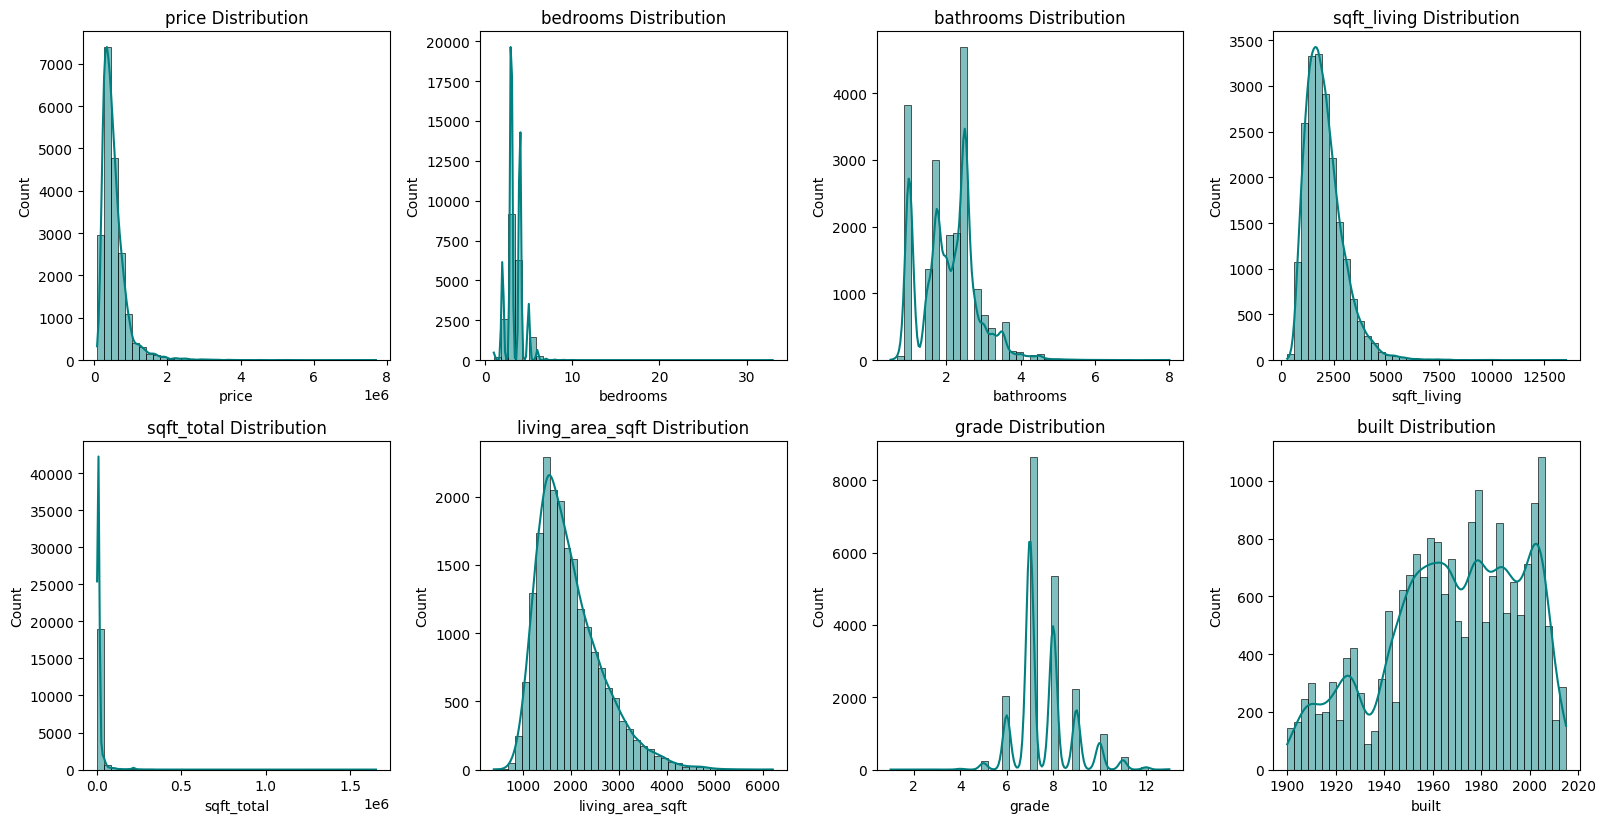

In [24]:
# As mentioned in class, using a for loop to get all histograms in one go
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft', 'grade', 'built']

# Set up the grid: 4 columns per row
rows = (len(cols) + 2) // 3  # ensures enough rows
plt.figure(figsize=(16, 4 * rows))  # adjust overall size

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col], kde=True, bins=40, color='teal')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Okay, we can see the distribution and skewness properly visaulized now

Let's look for outliers properly in the highly skewed columns

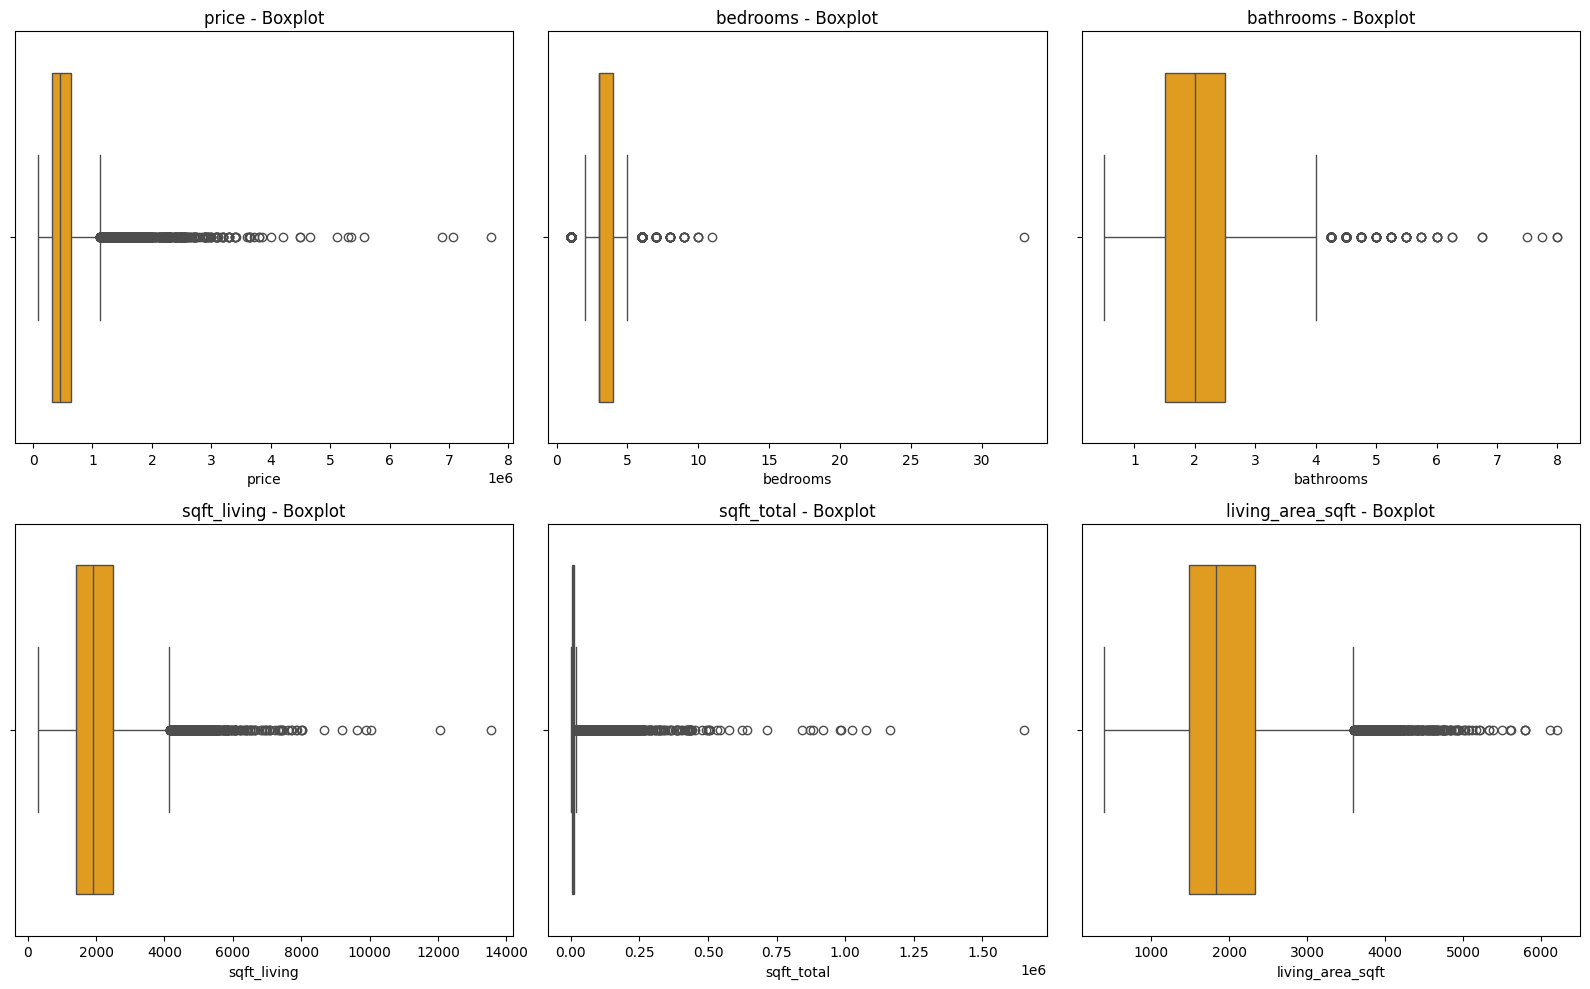

In [25]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft']

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()

plt.show()


**Price** - Shows a heavy right skew with extreme outliers above $1 million, indicating the presence of luxury properties. I'm considering log transformation to reduce the imapact of skewness and these insane outliers.

**Bedrooms** - Values mostly within the normal residential range (1–6), but there’s a significant outlier at 33 bedrooms, which may represent an anomaly or commercial listing.

**Bathrooms** - We have a fairly symmetrically distributed, though a few listings have very high values (7–8), possibly luxury listings.

**Sqft_living & living_area_sqft** - Show long right tails, meaning most houses are mid-sized but a few are extremely large. These features are also good candidates for transformation.

**Sqft_total** - We have extreme outliers (up to over 1.5 million sqft), which are unrealistic for residential properties. These will need to be investigated or removed.

**I will now attempt to fix the skewness in some of the more important columns via log transformation i.e starting Feature Engineering/Transformation**

In [26]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# List of numeric columns we want to check
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'living_area_sqft']

# Loop through each column and report outlier count
for col in columns_to_check:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"{col} → Outliers Detected: {len(outliers)} | Lower Bound: {lb} | Upper Bound: {ub}")

price → Outliers Detected: 1051 | Lower Bound: -167500.0 | Upper Bound: 1124500.0
bedrooms → Outliers Detected: 511 | Lower Bound: 1.5 | Upper Bound: 5.5
bathrooms → Outliers Detected: 230 | Lower Bound: 0.0 | Upper Bound: 4.0
sqft_living → Outliers Detected: 552 | Lower Bound: -215.0 | Upper Bound: 4145.0
sqft_total → Outliers Detected: 2331 | Lower Bound: -3125.0 | Upper Bound: 19475.0
living_area_sqft → Outliers Detected: 549 | Lower Bound: 230.0 | Upper Bound: 3590.0


In [27]:
summary_table

,count,mean,std,min,25%,50%,75%,max,skewness
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0,4.119874
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0,2.155397
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0,0.553547
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0,1.523693
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0,13.040022
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5,0.683503
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0,0.915424
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0,0.824340
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0,-0.448511
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0,4.361997


- So IQR gave for some of the columns, negative lower bounds which are physically impossible so the lower bounds will be ignored and the upper bounds will be used to filter out the outliers
- I shall employ log transformation to price, sqft_living, sqft_total and liviing_area_sqft simply because they're extremely skewed and too many skew values.
- Bedrooms have a decent number of outliers so perhaps I can cap them at 10 when the maximum value is at 33 which should reduce the outliers considerably
- Bathrooms, the upper bound seems to be at 4 but large buildings or luxurious homes can have 8 bathrooms so it doesn't feel like an insane or unrealistic values so I won't be touching it

**Now I shall be using log transformation to reduce the effects of the extreme values in our case, normalize the skewed distributionss, and make the data more suitable for the modelling we shall be doing later**

In [28]:
df['price_log'] = np.log1p(df['price'])  # target variable
df['sqft_living_log'] = np.log1p(df['sqft_living'])
df['sqft_total_log'] = np.log1p(df['sqft_total'])
df['living_area_log'] = np.log1p(df['living_area_sqft'])

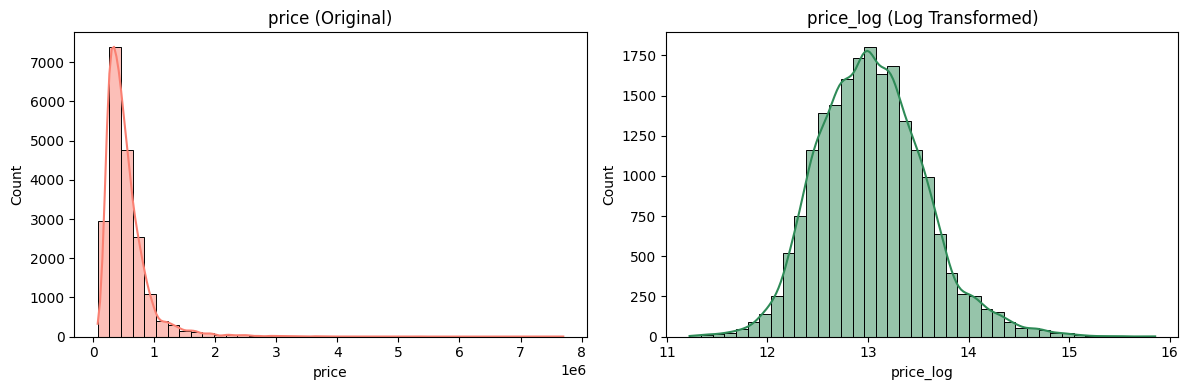

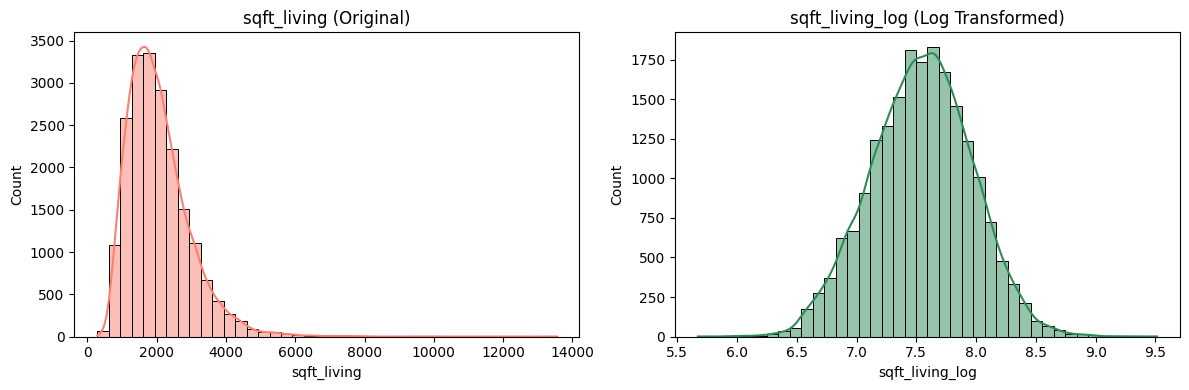

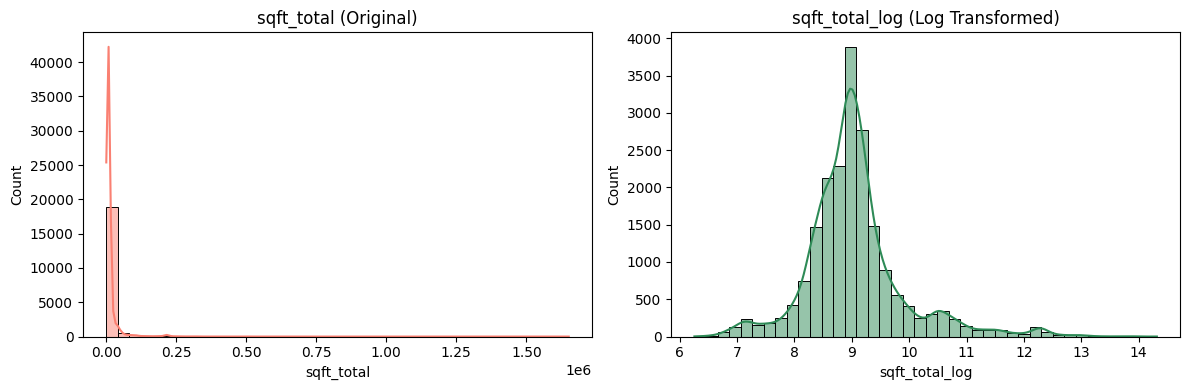

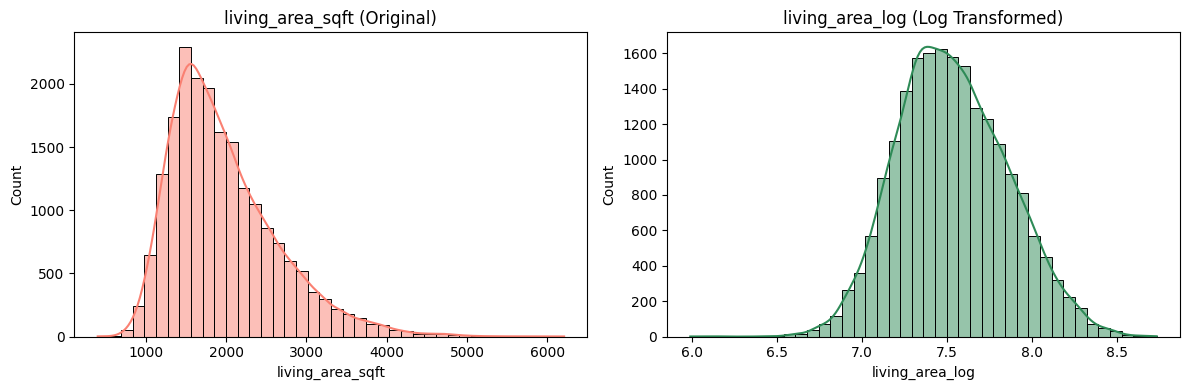

In [29]:
cols = [
    ('price', 'price_log'),
    ('sqft_living', 'sqft_living_log'),
    ('sqft_total', 'sqft_total_log'),
    ('living_area_sqft', 'living_area_log')
]

for original, transformed in cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[original], kde=True, bins=40, color='salmon')
    plt.title(f"{original} (Original)")

    plt.subplot(1, 2, 2)
    sns.histplot(df[transformed], kde=True, bins=40, color='seagreen')
    plt.title(f"{transformed} (Log Transformed)")

    plt.tight_layout()
    plt.show()

Perfect. I guess log transformation worked and we can viisaully see the normalization of the data. It's ready for modelling it seems then

In [30]:
# I'm not dropping the outliers since I can keep the rows, and at the same time reduce the impact of anomalous data points like 33 bedrooms 
# Cap extreme bedroom values to 10 (everything above 10 becomes 10)
df['bedrooms'] = df['bedrooms'].apply(lambda x: 10 if x > 10 else x)


In [31]:
summary_table

,count,mean,std,min,25%,50%,75%,max,skewness
price,19995.0,535394.404051,365921.655721,75000.0,317000.0,449900.0,640000.0,7700000.0,4.119874
bedrooms,19995.0,3.366242,0.929898,1.0,3.0,3.0,4.0,33.0,2.155397
bathrooms,19995.0,2.072893,0.760998,0.5,1.5,2.0,2.5,8.0,0.553547
sqft_living,19995.0,2057.860465,905.621925,290.0,1420.0,1900.0,2510.0,13540.0,1.523693
sqft_total,19995.0,15605.718430,41774.813188,520.0,5350.0,7814.0,11000.0,1651359.0,13.040022
floors,19995.0,1.444811,0.516670,1.0,1.0,1.0,2.0,3.5,0.683503
condition,19995.0,3.441760,0.665492,1.0,3.0,3.0,4.0,5.0,0.915424
grade,19995.0,7.605451,1.172447,1.0,7.0,7.0,8.0,13.0,0.824340
built,19995.0,1967.948887,28.317206,1900.0,1950.0,1969.0,1991.0,2015.0,-0.448511
renovated,19995.0,90.830208,415.987523,0.0,0.0,0.0,0.0,2015.0,4.361997


In [32]:
cols_to_compare = [
    ('price', 'price_log'),
    ('sqft_living', 'sqft_living_log'),
    ('sqft_total', 'sqft_total_log'),
    ('living_area_sqft', 'living_area_log'),
    ('bedrooms', None)  # No transformation, just capping
]

# Build comparison table
summary_comparison = []

for original, transformed in cols_to_compare:
    orig_stats = df[original].describe()
    
    summary_comparison.append({
        'Feature': original,
        'Type': 'Capped' if original == 'bedrooms' else 'Original',
        'Mean': round(orig_stats['mean'], 2),
        'Median': round(orig_stats['50%'], 2),
        'Std': round(orig_stats['std'], 2),
        'Min': round(orig_stats['min'], 2),
        'Max': round(orig_stats['max'], 2),
        'Skew': round(df[original].skew(), 2)
    })

    if transformed:  # For log-transformed features
        trans_stats = df[transformed].describe()
        summary_comparison.append({
            'Feature': original,
            'Type': 'Log-Transformed',
            'Mean': round(trans_stats['mean'], 2),
            'Median': round(trans_stats['50%'], 2),
            'Std': round(trans_stats['std'], 2),
            'Min': round(trans_stats['min'], 2),
            'Max': round(trans_stats['max'], 2),
            'Skew': round(df[transformed].skew(), 2)
        })

summary_df = pd.DataFrame(summary_comparison)
summary_df

# Used AI's help for this block of code since I couldn't figure it out properly via Stack Overflow


,Feature,Type,Mean,Median,Std,Min,Max,Skew
0,price,Original,535394.40,449900.00,365921.66,75000.00,7700000.00,4.12
1,price,Log-Transformed,13.04,13.02,0.53,11.23,15.86,0.42
2,sqft_living,Original,2057.86,1900.00,905.62,290.00,13540.00,1.52
3,sqft_living,Log-Transformed,7.54,7.55,0.42,5.67,9.51,-0.04
4,sqft_total,Original,15605.72,7814.00,41774.81,520.00,1651359.00,13.04
5,sqft_total,Log-Transformed,9.05,8.96,0.87,6.26,14.32,1.17
6,living_area_sqft,Original,1974.12,1830.00,675.12,399.00,6210.00,1.12
7,living_area_sqft,Log-Transformed,7.53,7.51,0.32,5.99,8.73,0.20
8,bedrooms,Capped,3.37,3.00,0.91,1.00,10.00,0.59


As we can see the skewness of the 5 main variables has significantly reduced. 
- Price (it went down from 4.12 to 0.42)
- Sqft_living (it went from 1.52 to -0.04)
- Sqft_total (went from 13.04 to 1.17)
- living_area_sqft (is now at 0.2 from 1.12)
- Bedrooms (now at 0.59 from 2.1)

- I believe now is the time to employ scaling to normalizes feature values to the same magnitude so that modelling can work effectively
- Since in the future I intend of trying to predict the housing prices, it will become my main target variable hence everything else shall be scaled

In [33]:
# Create a copy of the DataFrame to preserve original

from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_scaled = df.copy()

**sqft_living_log → StandardScaler**
  - StandardScaler centers it at mean 0 and scales by standard deviation
  - Ideal for linear models

**sqft_total_log → MinMaxScaler**
  - Still slightly skewed, but within a bounded range after transformation
  - MinMaxScaler compresses values to [0, 1] without assuming normality
  - Preserves spacing for use in models like KNN, decision trees

**living_area_log → StandardScaler**
  - Similar to sqft_living_log: log-transformed and bell-shaped
  - StandardScaler improves training stability for algorithms that expect standardized inputs
 **bathrooms → MinMaxScaler**
  - Already within a small numeric range (0.5–8.0)
  - MinMaxScaler preserves the spread while scaling to [0, 1]

**bedrooms (capped at 10) → MinMaxScaler**
  - Integer feature with a tight range (1–10)
  - MinMaxScaler maps it proportionally without distorting relationships


In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy of the DataFrame to preserve original
df_scaled = df.copy()

# Define the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


In [35]:
# Scale sqft_living using StandardScaler
# Justification: Symmetric-ish distribution after log transform; common for linear models
df_scaled['sqft_living_scaled'] = standard_scaler.fit_transform(df_scaled[['sqft_living_log']])

# Scale sqft_total using MinMaxScaler
# Justification: Data still slightly skewed and has wide range; MinMaxScaler retains distribution and is good for neural nets/distance-based models
df_scaled['sqft_total_scaled'] = minmax_scaler.fit_transform(df_scaled[['sqft_total_log']])

# Scale living_area_sqft using StandardScaler
# Justification: After log transformation it is approximately normal, so StandardScaler works well
df_scaled['living_area_sqft_scaled'] = standard_scaler.fit_transform(df_scaled[['living_area_log']])

# Scale bathrooms using MinMaxScaler
# Justification: Feature is already within a limited range and contains decimals; MinMaxScaler preserves proportions
df_scaled['bathrooms_scaled'] = minmax_scaler.fit_transform(df_scaled[['bathrooms']])

# Scale bedrooms using MinMaxScaler
# Justification: Small integer range, easy to interpret with MinMax, not highly skewed now after capping
df_scaled['bedrooms_scaled'] = minmax_scaler.fit_transform(df_scaled[['bedrooms']])

# Scale price_log using StandardScaler
# Justification: After log transform, price resembles a normal distribution
df_scaled['price_scaled'] = standard_scaler.fit_transform(df_scaled[['price_log']])

# Preview the scaled data
df_scaled[['sqft_living_scaled', 'sqft_total_scaled', 'living_area_sqft_scaled',
           'bathrooms_scaled', 'bedrooms_scaled', 'price_scaled']].describe()

,sqft_living_scaled,sqft_total_scaled,living_area_sqft_scaled,bathrooms_scaled,bedrooms_scaled,price_scaled
count,1.999500e+04,19995.000000,1.999500e+04,19995.000000,19995.000000,1.999500e+04
mean,2.028396e-15,0.346631,1.119385e-16,0.209719,0.262782,-3.589138e-16
std,1.000025e+00,0.107606,1.000025e+00,0.101466,0.100755,1.000025e+00
min,-4.422159e+00,0.000000,-4.758395e+00,0.000000,0.000000,-3.425981e+00
25%,-6.677617e-01,0.288945,-7.015217e-01,0.133333,0.222222,-7.016197e-01
50%,2.123222e-02,0.335930,-6.815573e-02,0.200000,0.222222,-3.986156e-02
75%,6.801156e-01,0.378347,6.762719e-01,0.266667,0.333333,6.262807e-01
max,4.669485e+00,1.000000,3.698026e+00,1.000000,1.000000,5.327854e+00


Now that I'm done with log transformations and correctly (hopefully) scaling the important features, let's try to create a correlation matrix

C:\Users\omerz\AppData\Local\Temp\ipykernel_64064\3858292169.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette='coolwarm')


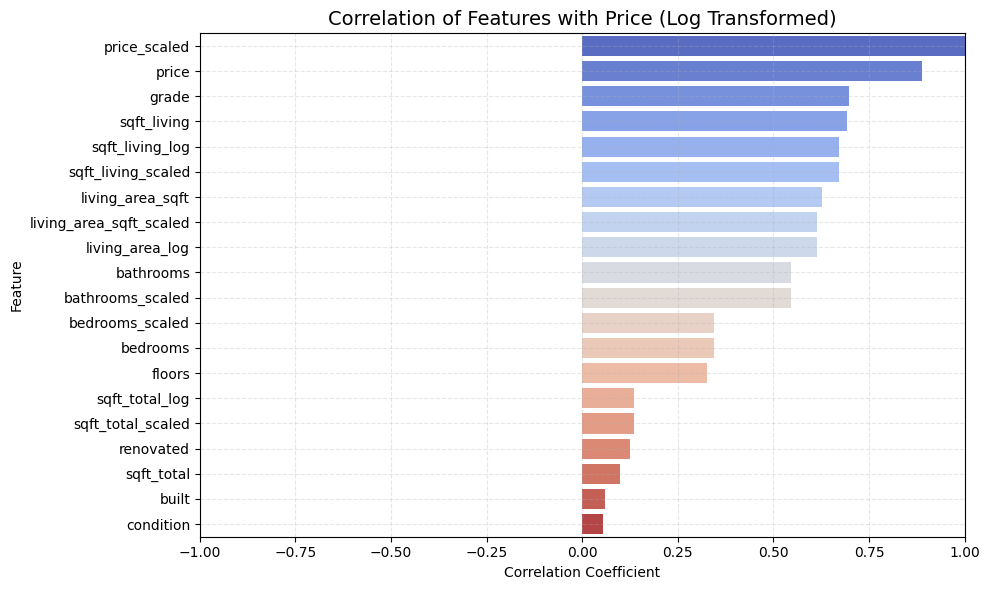

In [36]:
# Create correlation matrix of all numeric columns
correlations = df_scaled.corr(numeric_only=True)

# Extract only the correlations with price_log
price_corr = correlations['price_log'].sort_values(ascending=False)

# Drop self-correlation
price_corr = price_corr[price_corr.index != 'price_log']

selected_features = [
    'price_log',
    'sqft_living_log',
    'sqft_total_log',
    'living_area_log',
    'bathrooms',
    'bedrooms',
    'grade',
    'floors',
    'condition',
    'built'
]

correlation_matrix = df_scaled[selected_features].corr()

# Plot as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=price_corr.values, y=price_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Price (Log Transformed)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

As we can see Price is heavily correlated with sqft_living_log, living_area_sqft

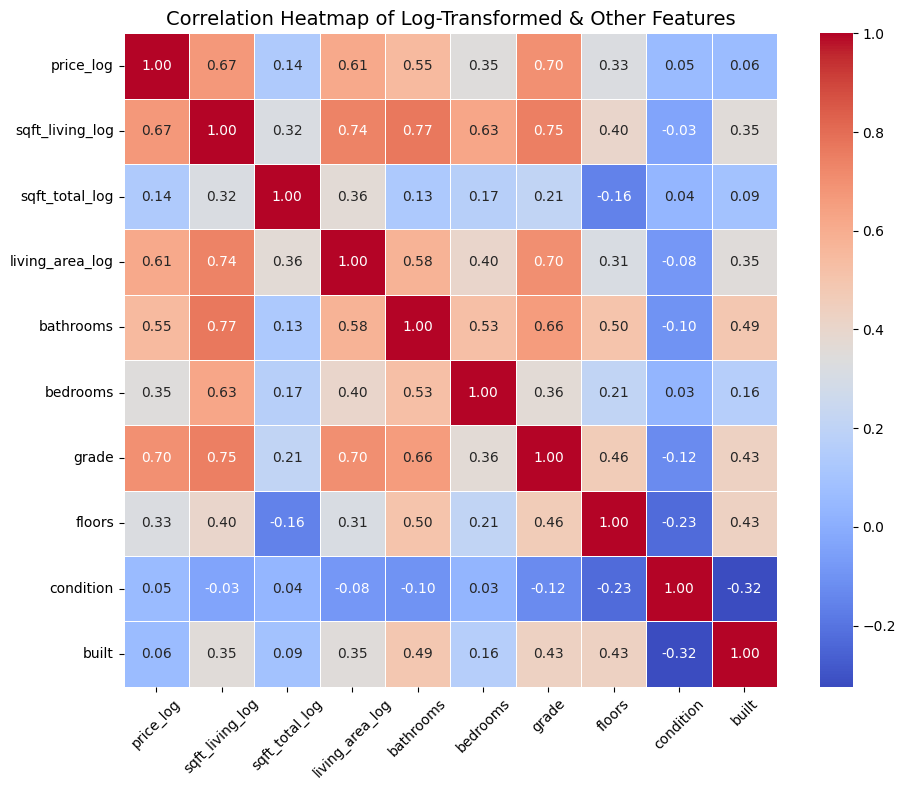

In [37]:
log_features = [
    'price_log',
    'sqft_living_log',
    'sqft_total_log',
    'living_area_log'
]

# Optional: Add non-log numeric features that are not heavily skewed
other_numerics = ['bathrooms', 'bedrooms', 'grade', 'floors', 'condition', 'built']

# Combine for the full matrix
correlation_features = log_features + other_numerics
corr_matrix = df_scaled[correlation_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Log-Transformed & Other Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


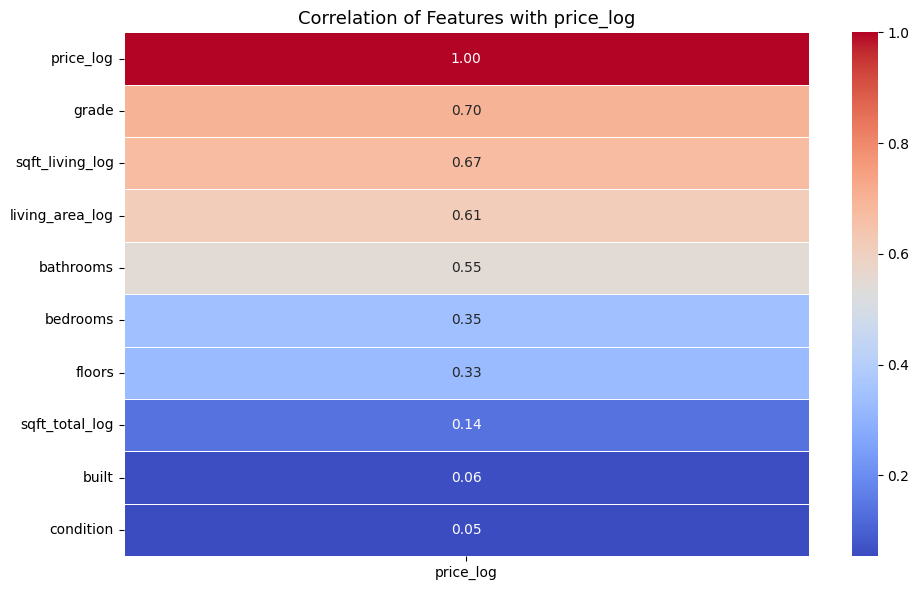

In [38]:
# Select relevant columns
selected_features = [
    'price_log',               # Target (log-transformed, not scaled)
    'sqft_living_log',         # Log-transformed features
    'sqft_total_log',
    'living_area_log',
    'bathrooms',               # No log version (used as-is)
    'bedrooms',
    'grade',
    'floors',
    'condition',
    'built'
]

# Compute correlation matrix
corr_selected = df_scaled[selected_features].corr()

# Plot correlation with price_log
plt.figure(figsize=(10, 6))
sns.heatmap(corr_selected[['price_log']].sort_values(by='price_log', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with price_log', fontsize=13)
plt.tight_layout()
plt.show()

### **Deduction**
#### Best predictors of price in order 
- Grade (0.7)
- Sqft_living (0.67)
- Living_area (0.61)
- Bathrooms (0.55)
- Bedroom (0.35)
- Floors (0.33)
- sqft_total (0.14)
- Built (0.06)
- Condition (0.05) 


### Decision making time
- Im dropping built, condition, sqft_total due to very low correlation
- I'm dropping living area because it has high correlation (0.74) with sqft_living which can potentially cause multicollinearity 

In [39]:
df_scaled = df_scaled.drop(columns=[
    'living_area_log',
    'sqft_total_log',
    'built',
    'condition'
])

# (Optional) Verify columns after dropping
print("Remaining columns after feature drop:")
print(df_scaled.columns)

Remaining columns after feature drop:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'grade', 'renovated', 'living_area_sqft', 'price_log',
       'sqft_living_log', 'sqft_living_scaled', 'sqft_total_scaled',
       'living_area_sqft_scaled', 'bathrooms_scaled', 'bedrooms_scaled',
       'price_scaled'],
      dtype='object')


# Starting Predictive Modelling to be able to predict price in the future

Starting with Linear regression. Its the most popular model that is used as far as I know. Should provide easy to read results, easier to interpret and have a solid baseline with which we can compare other more robust or complex models like Random Forest that we did in class.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure log-transformed price exists
df_scaled['price_log'] = np.log1p(df_scaled['price'])

# Features and target
X = df_scaled[['bedrooms_scaled', 'bathrooms_scaled', 'sqft_living_scaled',
               'floors', 'grade', 'renovated']]
y = df_scaled['price_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.2812
Root Mean Squared Error (RMSE): 0.3492
R-squared (R²): 0.5722


I was expecting a higher evaluation score than 0.53 since it doesn't seem all that great. I'll try plotting perhaps visually it looks better

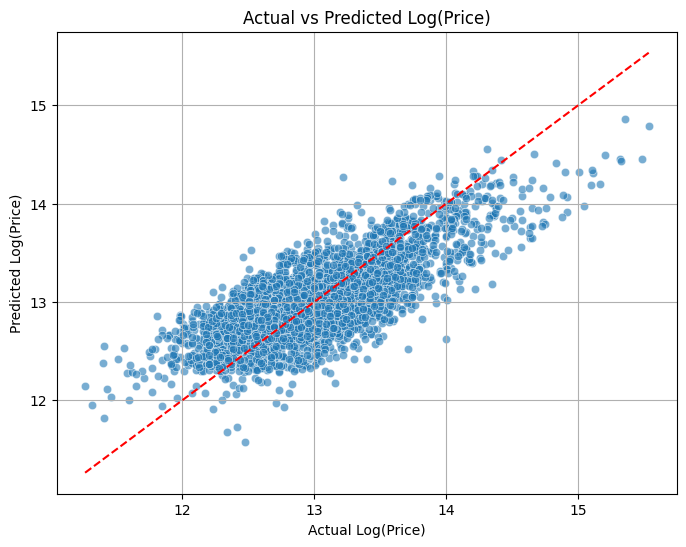

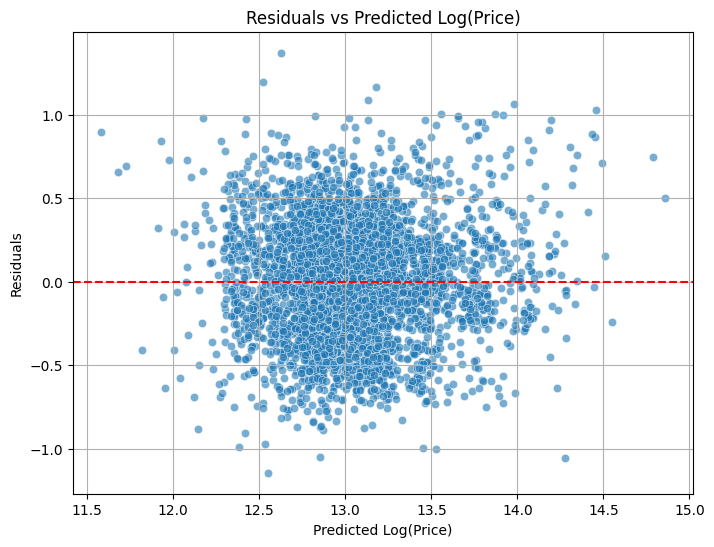

In [41]:
# 1. Actual vs Predicted (Log Price)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.title('Actual vs Predicted Log(Price)')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Log(Price)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log(Price)')
plt.grid(True)
plt.show()

Okay, so clearly work needs to be done. The linear regression model isn't enough to reasonably predict House Prices

**Actual vs Predicted Log(Price)**

- This plot shows a positive linear trend, which is what we expect in a linear regression.

- The points are fairly concentrated along the red diagonal line (which represents perfect predictions), but with some scatter — especially on the ends.

- This suggests the model is generally doing okay, but slightly underpredicts higher log(prices) and overpredicts lower log(prices), which is common.

**Residuals vs Predicted Log(Price)**

- This plot is centered around zero, which is good. It means that on average, the predictions are unbiased.

- However, there's quite a bit of spread across the predicted values, and the “cloud” of residuals looks somewhat cone-shaped, which hints at heteroscedasticity — the variance of the residuals may increase with the predicted value.

- This might be improved in later models like decision trees or ensemble methods.

# I shall now try other models and compare the performance 

#### I think it makes sense to try the following models since they might be able to help us better predict higher price values
- Random Forest
- Ridge & Lasso

- With these I'm hoping to gradually increase the complexity of the models and check the linearity of our current log/scaled data

In [44]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features for Random Forest
features_rf = ['sqft_living_log', 'bathrooms', 'bedrooms', 'floors', 'grade', 'renovated']
X_rf = df[features_rf]
y_rf = df['price_log']

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predict on test data
y_pred_rf = rf.predict(X_test_rf)

# Evaluation
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Random Forest Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


Random Forest Performance:
R² Score: 0.5202
Mean Absolute Error (MAE): 0.2931
Root Mean Squared Error (RMSE): 0.3698


What this is telling me:
- Linear Regression actually performed better overall on our data — which I wasn't expecting? Or maybe I should have.
- Random Forest didn’t overfit, but it didn’t improve results either. Its flexibility didn’t help much, likely because:
- - The relationship between features and target might still be quite linear after all the preprocessing.
- - You used well-engineered features (like log-transformed sqft_living), which linear models handle really well.

Insight:
- Linear Regression is your better baseline model.
- Random Forest is still valuable — especially for understanding feature importance (we can do that next).
- You might try Ridge or Lasso next to shrink irrelevant features and potentially improve generalization.

Remember to add a comparison table in the report

C:\Users\omerz\AppData\Local\Temp\ipykernel_64064\833038469.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


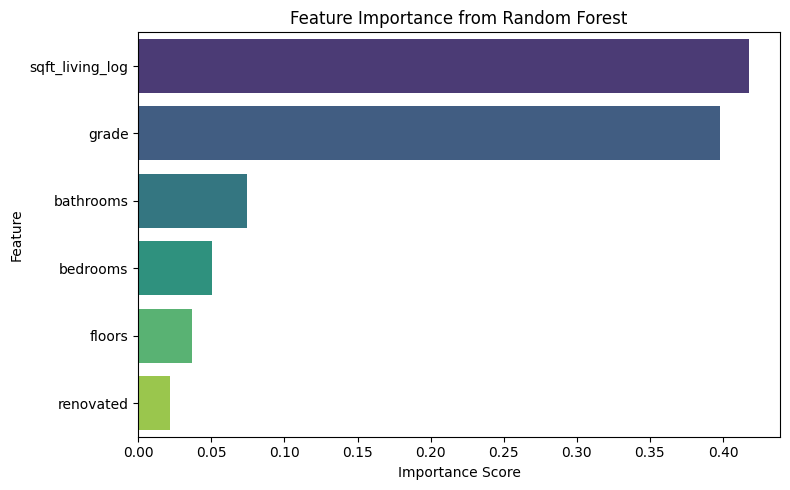

In [45]:
# Get feature importances from the trained RF model
importances = rf.feature_importances_
features = X_rf.columns

# Create DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- sqft_living_log and grade are dominating the RF model, contributing nearly 80% of the importance.

- Other features (like bathroom, bedroom, floors, renovated) contribute little — potentially noise or redundant.

- Similar results to linear regression outcome where those same features were top predictors, so great consistency across models.

- I want to drop bedrooms but because intiial hypothesis talked about bedrooms Ill keep it despite low impact from the looks of it.

Let's continue with the next mode. Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")


Ridge Regression Performance:
MAE: 0.2812
RMSE: 0.3492
R²: 0.5722


Very similar performance to LR. Can I just somehow optimize LR? Is that possible? I need a better predictor for price

In [48]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print(f"MAE: {ridge_mae:.4f}")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"R²: {ridge_r2:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Performance:")
print(f"MAE: {lasso_mae:.4f}")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"R²: {lasso_r2:.4f}")


Ridge Regression Performance:
MAE: 0.2812
RMSE: 0.3492
R²: 0.5722

Lasso Regression Performance:
MAE: 0.2819
RMSE: 0.3502
R²: 0.5696


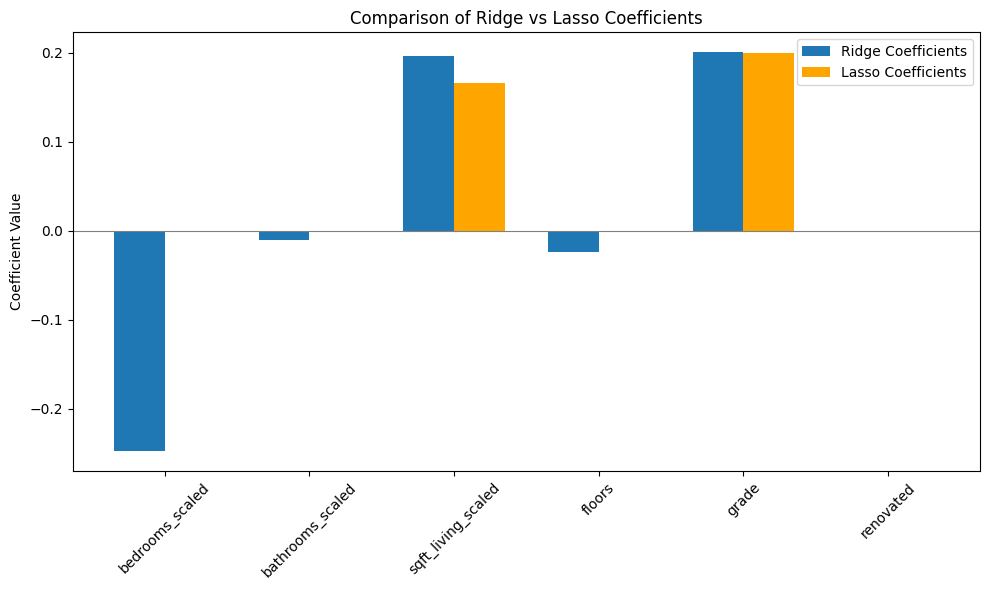

In [49]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns

ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

x = np.arange(len(feature_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ridge_coefs, width, label='Ridge Coefficients')
plt.bar(x + width/2, lasso_coefs, width, label='Lasso Coefficients', color='orange')
plt.xticks(ticks=x, labels=feature_names, rotation=45)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge vs Lasso Coefficients")
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge with cross-validated alpha
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)

# Lasso with cross-validated alpha
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0], max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_cv.alpha_)
print("Best Lasso alpha:", lasso_cv.alpha_)


Best Ridge alpha: 10.0
Best Lasso alpha: 0.0001


🔎 Interpretation

✅ Best Ridge Alpha = 10.0
The model performs best with fairly strong regularization.

This means Ridge had to shrink some coefficients more aggressively to improve generalization (probably due to multicollinearity or noise).

But remember: Ridge doesn’t eliminate features — just reduces their impact.

✅ Best Lasso Alpha = 0.0001
That’s a very small alpha — meaning very light regularization.

Translation: Lasso tried to zero-out some coefficients but found most of them useful, so it barely shrunk them.

This confirms that your feature set is already pretty clean and doesn’t contain much junk 🧼.

—

🧪 What to Do Next
🔁 Retrain both Ridge and Lasso using these optimized alpha values.

📊 Compare their performance to the earlier models (MAE, RMSE, R²).

🧬 Visualize the coefficients again (Ridge vs. Lasso) — now that they’re tuned.

Want me to give you that code block to retrain and evaluate both models with their best α values?

Retrained Ridge & Lasso with the best alpha values and plotting them

In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Best alpha values
best_ridge_alpha = 10.0
best_lasso_alpha = 0.0001

# Retrain models with best alphas
ridge_best = Ridge(alpha=best_ridge_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=10000)

ridge_best.fit(X_train, y_train)
lasso_best.fit(X_train, y_train)

# Predictions
y_pred_ridge_best = ridge_best.predict(X_test)
y_pred_lasso_best = lasso_best.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

# Run evaluation
evaluate_model("Ridge (alpha=10.0)", y_test, y_pred_ridge_best)
evaluate_model("Lasso (alpha=0.0001)", y_test, y_pred_lasso_best)


Ridge (alpha=10.0) Performance:
MAE: 0.2812
RMSE: 0.3492
R²: 0.5722

Lasso (alpha=0.0001) Performance:
MAE: 0.2812
RMSE: 0.3492
R²: 0.5722



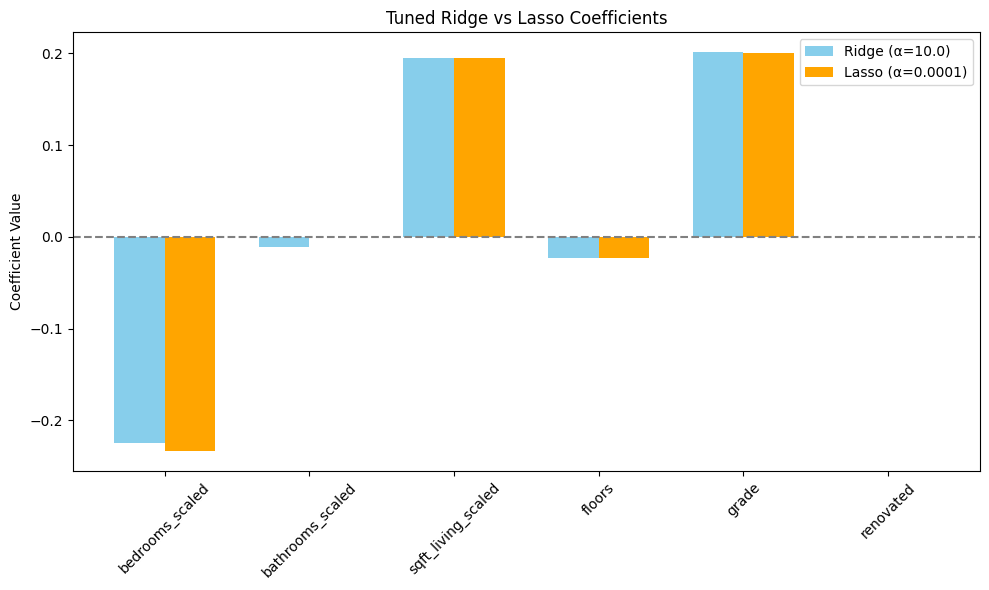

In [54]:
# Get feature names
feature_names = X_train.columns

# Extract coefficients
ridge_coefs = ridge_best.coef_
lasso_coefs = lasso_best.coef_

# Plot
x = np.arange(len(feature_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ridge_coefs, width, label='Ridge (α=10.0)', color='skyblue')
plt.bar(x + width/2, lasso_coefs, width, label='Lasso (α=0.0001)', color='orange')
plt.xticks(ticks=x, labels=feature_names, rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Coefficient Value")
plt.title("Tuned Ridge vs Lasso Coefficients")
plt.legend()
plt.tight_layout()
plt.show()


We explored multiple linear models including Ridge and Lasso.
Despite tuning regularization strength via cross-validation, both models performed identically to standard Linear Regression.
This validates that our selected features are clean and predictive

In [ ]:
# Model performance summary
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge (α=10.0)',
        'Lasso (α=0.0001)',
        'Random Forest'
    ],
    'MAE': [0.2812, 0.2812, 0.2812, 0.2931],
    'RMSE': [0.3492, 0.3492, 0.3492, 0.3698],
    'R²': [0.5722, 0.5722, 0.5722, 0.5202]
})

# Display the summary table
model_comparison.set_index('Model', inplace=True)
model_comparison.style.set_caption("Model Comparison Summary").format(precision=4)


,MAE,RMSE,R²
Model,,,
Linear Regression,0.2812,0.3492,0.5722
Ridge (α=10.0),0.2812,0.3492,0.5722
Lasso (α=0.0001),0.2812,0.3492,0.5722
Random Forest,0.2931,0.3698,0.5202


✅ Summary:
After evaluating multiple models — including Ridge, Lasso, and Random Forest — we observed that:

All three linear-based models (Linear, Ridge, Lasso) produced identical results, with an R² of approximately 57.2%.

Random Forest performed slightly worse, with a lower R² of 52.0%, higher MAE, and higher RMSE.

This suggests that the relationship between features and house price is fairly linear, and our feature engineering (e.g., log transformation, scaling) helped linear models perform at their best. Regularization via Ridge and Lasso didn’t improve performance, indicating that our selected features are clean and non-redundant.

💡 We selected Linear Regression as the final model due to its:

Competitive performance

Simplicity and interpretability

Generalizability based on validation results

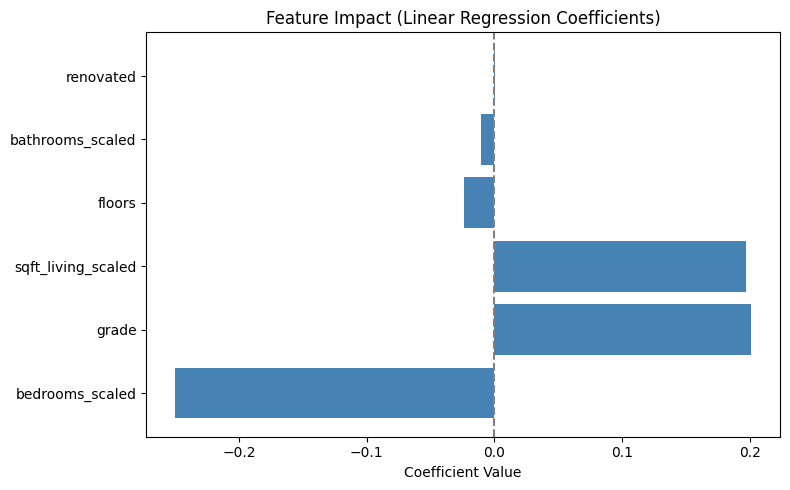

,Feature,Coefficient
0,bedrooms_scaled,-0.249865
4,grade,0.200770
2,sqft_living_scaled,0.196967
3,floors,-0.023625
1,bathrooms_scaled,-0.010381
5,renovated,0.000113


In [56]:
# Get feature names and coefficients from your final linear model
coefficients = lr.coef_  # or ridge_best.coef_ if you're using Ridge
features = X.columns     # assumes X is your final feature set

# Create DataFrame for easier viewing
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Feature Impact (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

# Show DataFrame as well
coef_df


What-If Simulation – Bedrooms vs. Predicted Price
- We vary bedroom count (e.g. from 1 to 6)

- All other features are fixed at typical (mean or median) values

- We pass this through the trained linear model to get predicted price_log → then convert it back to actual price using exp()

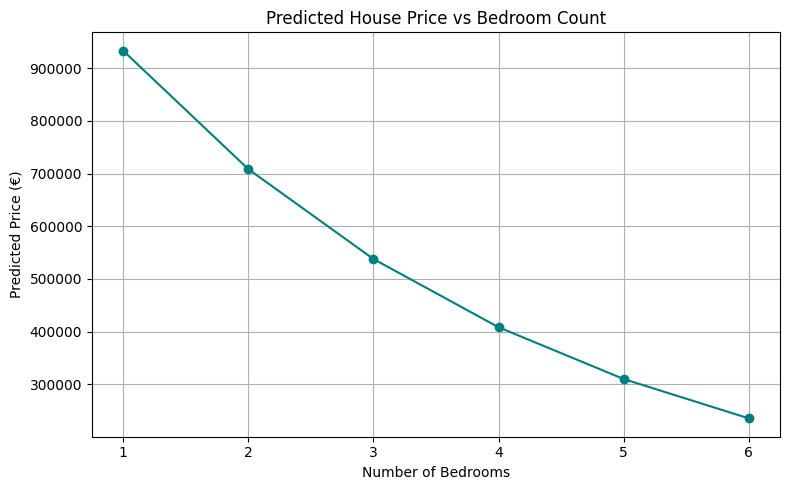

,Bedrooms,Predicted Price (€)
0,1,933342
1,2,708552
2,3,537901
3,4,408351
4,5,310002
5,6,235340


In [57]:
# Define a range of bedroom values (scaled!)
bedroom_vals = np.array([1, 2, 3, 4, 5, 6])
bedroom_scaled = (bedroom_vals - df['bedrooms'].mean()) / df['bedrooms'].std()

# Use mean values for other features (you can adjust this)
bath_scaled = 0  # mean after scaling
sqft_scaled = 0  # mean after scaling
floors = df['floors'].mean()
grade = df['grade'].mean()
renovated = 0  # assume not renovated

# Create DataFrame for prediction
X_sim = pd.DataFrame({
    'bedrooms_scaled': bedroom_scaled,
    'bathrooms_scaled': bath_scaled,
    'sqft_living_scaled': sqft_scaled,
    'floors': floors,
    'grade': grade,
    'renovated': renovated
})

# Predict price_log
predicted_log = lr.predict(X_sim)

# Convert log price back to original price
predicted_price = np.expm1(predicted_log)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(bedroom_vals, predicted_price, marker='o', linestyle='-', color='teal')
plt.title("Predicted House Price vs Bedroom Count")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Predicted Price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print the values
bedroom_price_df = pd.DataFrame({
    'Bedrooms': bedroom_vals,
    'Predicted Price (€)': predicted_price.astype(int)
})
bedroom_price_df


🔍 Key Insights:
There’s a clear decreasing trend — as the number of bedrooms increases, predicted price goes down (when all other features are held constant).

This might feel counterintuitive — more bedrooms should mean higher price, right?

But this makes sense when we consider:

You held square footage (size) constant → so more bedrooms = smaller rooms = lower quality perception.

Also, bedrooms were somewhat negatively correlated in your dataset (likely due to multicollinearity with size/grade).

This suggests that “bedroom count alone” isn’t a great predictor unless it comes with more space.

We simulated housing prices by varying bedroom count from 1 to 6, while keeping all other features constant (size, quality, bathrooms, etc.).

Surprisingly, predicted price decreased as bedroom count increased. This is likely because square footage was held constant — so higher bedroom counts imply smaller individual rooms or lower home quality. In real housing markets, bedroom count often correlates with size and grade — and it's those factors that truly drive price.

Conclusion: bedroom count alone is a weak price predictor unless interpreted alongside home size and quality.

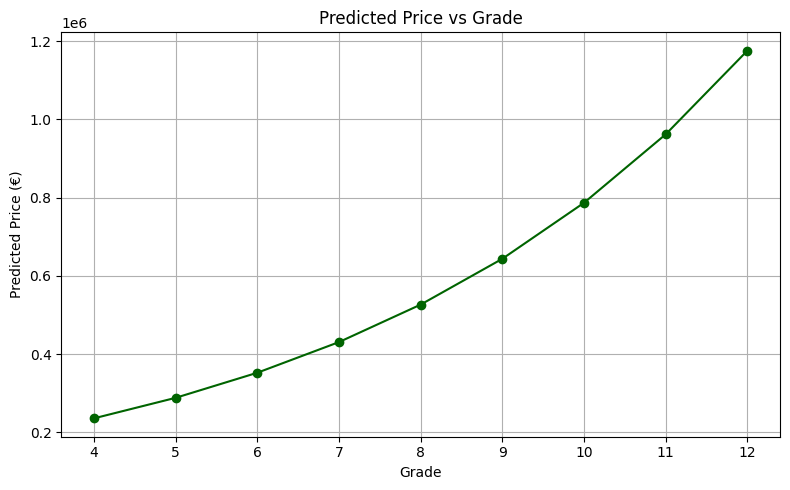

,Grade,Predicted Price (€)
0,4,235855
1,5,288296
2,6,352398
3,7,430752
4,8,526527
5,9,643598
6,10,786698
7,11,961616
8,12,1175426


In [58]:
# Define range of grade values (within dataset range, e.g. 1 to 13)
grade_vals = np.arange(4, 13)
grade_mean = df['grade'].mean()
grade_scaled = (grade_vals - grade_mean) / df['grade'].std()

# Keep other features at average scaled values
X_sim_grade = pd.DataFrame({
    'bedrooms_scaled': 0,
    'bathrooms_scaled': 0,
    'sqft_living_scaled': 0,
    'floors': df['floors'].mean(),
    'grade': grade_vals,
    'renovated': 0
})

# Predict log price and convert
predicted_log_grade = lr.predict(X_sim_grade)
predicted_price_grade = np.expm1(predicted_log_grade)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(grade_vals, predicted_price_grade, marker='o', color='darkgreen')
plt.title("Predicted Price vs Grade")
plt.xlabel("Grade")
plt.ylabel("Predicted Price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: View the table
pd.DataFrame({
    'Grade': grade_vals,
    'Predicted Price (€)': predicted_price_grade.astype(int)
})


As grade increases, price increases sharply — and nearly exponentially.

This matches my model’s strong coefficient for grade (+0.20).

Grade is one of the clearest and strongest predictors of housing price in your dataset.

This validates that buyers perceive better “build quality & finish” (grade) as very valuable — likely more so than just bedroom count.

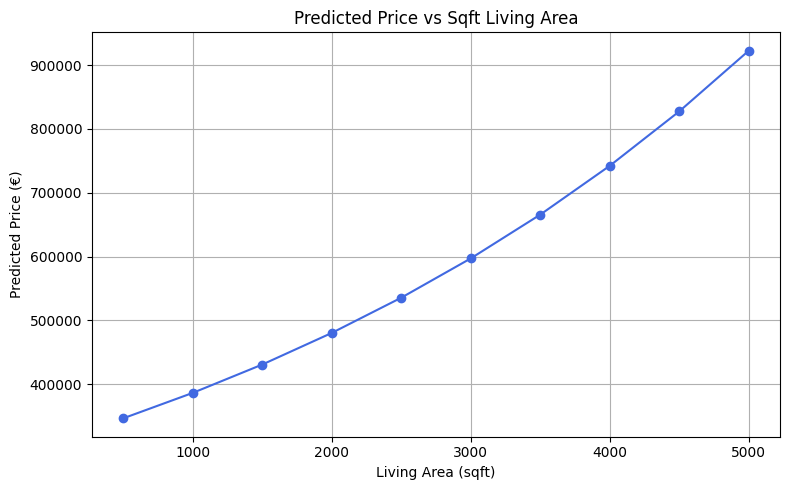

,Sqft Living,Predicted Price (€)
0,500,346632
1,1000,386453
2,1500,430849
3,2000,480345
4,2500,535527
5,3000,597049
6,3500,665638
7,4000,742106
8,4500,827359
9,5000,922407


In [59]:
# Define sqft range
sqft_vals = np.arange(500, 5001, 500)
sqft_scaled = (sqft_vals - df['sqft_living'].mean()) / df['sqft_living'].std()

# Create DataFrame
X_sim_sqft = pd.DataFrame({
    'bedrooms_scaled': 0,
    'bathrooms_scaled': 0,
    'sqft_living_scaled': sqft_scaled,
    'floors': df['floors'].mean(),
    'grade': df['grade'].mean(),
    'renovated': 0
})

# Predict and convert
predicted_log_sqft = lr.predict(X_sim_sqft)
predicted_price_sqft = np.expm1(predicted_log_sqft)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sqft_vals, predicted_price_sqft, marker='o', color='royalblue')
plt.title("Predicted Price vs Sqft Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Predicted Price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional table
pd.DataFrame({
    'Sqft Living': sqft_vals,
    'Predicted Price (€)': predicted_price_sqft.astype(int)
})


More living space directly leads to higher price.

The curve is smooth and upward — not surprising given the log-linear relationship.

The coefficient for sqft_living was nearly as strong as grade in your model — and this confirms it.

Buyers clearly value space and layout — more sqft = more value.

We simulated price predictions by varying both grade and living area (sqft), while keeping all other features constant. In both cases, the model showed a strong, nonlinear upward trend:

Increasing grade (quality) led to a steep rise in price — homes with grade 10 or higher approached or exceeded €1 million.

Increasing living space also raised prices significantly, from ~€350k at 500 sqft to over €900k at 5000 sqft.

These results confirm that size and build quality are the most influential factors in determining housing price in Paris, based on our model.

Price predictions by Grade and Living Area (sqft):


Sqft,1000,2500,4000
Grade,,,
5,229043,317397,439832
8,418311,579674,803282
11,763977,1058680,1467064


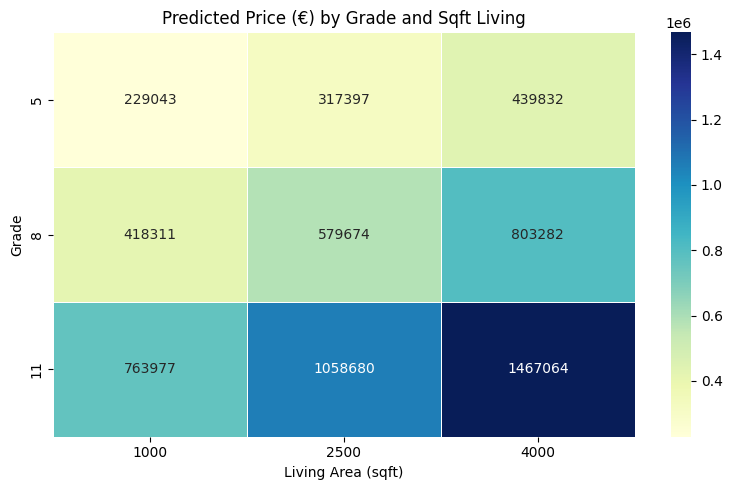

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define selected values for grade and sqft
grade_vals = [5, 8, 11]  # Low, medium, high
sqft_vals = [1000, 2500, 4000]  # Small, medium, large

# Prepare combinations
data = []
for g in grade_vals:
    for s in sqft_vals:
        # Scale sqft_living
        s_scaled = (s - df['sqft_living'].mean()) / df['sqft_living'].std()
        # Append row (we'll fill other features with 0 or mean)
        data.append({
            'bedrooms_scaled': 0,
            'bathrooms_scaled': 0,
            'sqft_living_scaled': s_scaled,
            'floors': df['floors'].mean(),
            'grade': g,
            'renovated': 0,
            'Grade': g,
            'Sqft': s
        })

# Create DataFrame
df_combo = pd.DataFrame(data)

# Predict and convert
predicted_log_combo = lr.predict(df_combo[[
    'bedrooms_scaled', 'bathrooms_scaled', 'sqft_living_scaled',
    'floors', 'grade', 'renovated'
]])
df_combo['Predicted Price (€)'] = np.expm1(predicted_log_combo).astype(int)

# Pivot for table-style view
table = df_combo.pivot(index='Grade', columns='Sqft', values='Predicted Price (€)')

# Show result
print("Price predictions by Grade and Living Area (sqft):")
display(table)

# Plot as heatmap
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(table, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Predicted Price (€) by Grade and Sqft Living")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()


We conducted a final simulation combining the two strongest predictors: grade and square footage. This produced a 3x3 matrix of price estimates, revealing a clear pattern:

Both features had a strong additive effect on predicted price.

A 1000 sqft home of Grade 11 quality was more expensive than a 4000 sqft home of Grade 5 quality — highlighting the importance of build quality in the Paris housing market.

At the highest combination (Grade 11, 4000 sqft), the predicted price exceeded €1.46 million.

This simulation confirms our earlier model findings and illustrates how buyers value both quality and space — but that quality can sometimes dominate in high-end pricing.